In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('quora_duplicate_questions.csv')

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,False
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,False
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,False
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,False
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404348 non-null  object
 5   is_duplicate  404351 non-null  bool  
dtypes: bool(1), int64(3), object(2)
memory usage: 15.8+ MB


In [5]:
df['is_duplicate'] = df['is_duplicate'].map({True : 1, False : 0})

df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
df['is_duplicate'].value_counts(normalize = True)*100

# suggesting slight imbalance

0    63.07515
1    36.92485
Name: is_duplicate, dtype: float64

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

# insignificant amount of null values

id              0
qid1            0
qid2            0
question1       1
question2       3
is_duplicate    0
dtype: int64

In [9]:
df[(df['question1'].isnull()) | (df['question2'].isnull())]

,id,qid1,qid2,question1,question2,is_duplicate
105796,105796,209841,209842,How can I develop android app?,NaN,0
141302,141302,279686,279687,Deleted.,NaN,0
201871,201871,398348,398349,How can I create an Android app?,NaN,0
363416,363416,711434,711435,NaN,My Chinese name is Haichao Yu. What English na...,0


In [10]:
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique Questions :', qid.nunique())

Number of unique Questions : 789801


In [11]:
x = qid.value_counts() > 1
print('Number of Questions getting repeated :', x[x].shape[0])

Number of Questions getting repeated : 13698


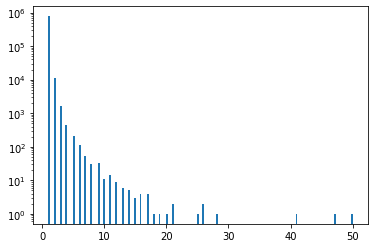

In [12]:
# repeat questions histogram

plt.hist(qid.value_counts().values, bins = 160)
plt.yscale('log')
plt.show()